In [1]:
# tracking cmip6data

In [2]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
track_filepath = '/user/home/al18709/tropical_cyclones/figures/CMIP6_tracks/ACCESS-ESM1-5_historical_r1i1p1f1_gn_VOR850_jan-dec2014_T42/tr_trs_pos.2day_addvorT63_addwind.tcident.new.csv'

In [4]:
track = pd.read_csv(track_filepath)
columns = ['Track_ID',  'Date/Time', 'longitude', 'latitude', 'intensity(vorticity)', 'longitude850', 'latitude850', 'vor850', 'longitude500', 'latitude500', 'vor500', 'longitude250', 'latitude250', 'vor250', 'longitude850', 'latutude850', 'windspeed850','blank']
track.columns = columns

In [5]:
print(track.loc[0])

Track_ID                                     1
Date/Time                "2014-01-03 12:00:00"
longitude                           111.933151
latitude                             29.293312
intensity(vorticity)                  1.488117
longitude850                          108.9369
latitude850                           26.42388
vor850                                5.299512
longitude500                           107.645
latitude500                           32.21984
vor500                                7.823341
longitude250                          110.7382
latitude250                           26.98086
vor250                               -3.844838
longitude850                          109.6875
latutude850                             24.375
windspeed850                          15.78266
blank                                         
Name: 0, dtype: object


In [6]:
rain_filepath = '/user/home/al18709/work/CMIP6/ACCESS-ESM1-5/historical/pr_3hr_ACCESS-ESM1-5_historical_r1i1p1f1_gn_201001010130-201412312230.nc'
rain = xr.load_dataset(rain_filepath)
rain_2014 = rain.where(rain.time.dt.year==2014,drop=True)

In [7]:
print(rain_2014)

<xarray.Dataset>
Dimensions:    (time: 2920, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 2014-01-01T01:30:00 ... 2014-12-31T22:30:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2014-01-01 ... 2015-01-01
    lat_bnds   (lat, bnds, time) float64 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0
    lon_bnds   (lon, bnds, time) float64 -0.9375 -0.9375 -0.9375 ... 359.1 359.1
    pr         (time, lat, lon) float32 1.717e-06 1.717e-06 ... 2.268e-06
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  21915.0
    creation_date:          2019-11-15T03:30:05Z
    ...                     ...
    variable_id:            pr
    

In [8]:
storm_lats = track['latitude']
storm_lons = track['longitude']
print(storm_lats)

0       29.293312
1       29.411438
2       29.937744
3       30.127831
4       30.154337
          ...    
2517    40.249134
2518    40.607475
2519    40.214230
2520    39.580013
2521    39.004074
Name: latitude, Length: 2522, dtype: float64


 "2014-01-08 12:00:00"
[ 1  1  1 ... 12 12 12]
[ 1  1  1 ... 31 31 31]
[ 7 10 13 16 19 22  1  4  7 10]
1
8
12
hi


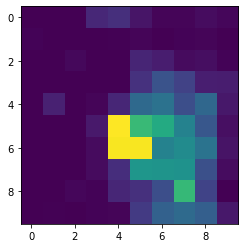

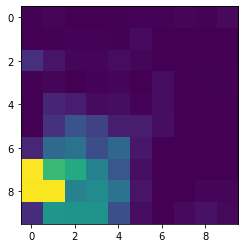

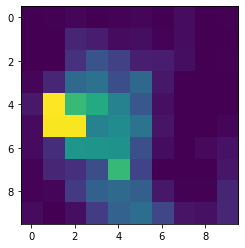

In [44]:
import datetime

i= 20

storm_lat = storm_lats[i]
storm_lon = storm_lons[i]
storm_time = track['Date/Time'][i]
print(storm_time)
# TODO: remove speech marks?
storm_time = datetime.datetime.strptime(storm_time, ' "%Y-%m-%d %H:%M:%S"')
print(rain_2014.time.dt.month.values)
print(rain_2014.time.dt.day.values)
print(rain_2014.time.dt.hour.values[10:20])
print(storm_time.month)
print(storm_time.day)
print(storm_time.hour)
rain_time = rain_2014.where((rain_2014.time.dt.month==storm_time.month) & (rain_2014.time.dt.day == storm_time.day) & (rain_2014.time.dt.hour == storm_time.hour +1),drop=True)

ilon = list(rain_time.lon.values).index(rain_time.sel(lon=storm_lon, method='nearest').lon)
ilat = list(rain_time.lat.values).index(rain_time.sel(lat=storm_lat, method='nearest').lat)

plt.imshow(rain_time.pr.values[0,ilat-5:ilat+5,ilon-5:ilon+5])
print('hi')
plt.show()
plt.imshow(rain_time.pr.values[0,ilat-7:ilat+3,ilon-1:ilon+9])
plt.show()
plt.imshow(rain_time.pr.values[0,ilat-4:ilat+6,ilon-2:ilon+8])
plt.show()
# TODO: timing seems to be wrong: storm track is at standard time, rain time is an hour ahead.

In [ ]:
# precip is accumulated over hour hence why 1 hour delay.